In [1]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

In [8]:
data_train = pd.read_csv("D:\\Python\\Kaggle_data\\Titanic\\data_plot.csv")

In [9]:
data_train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,...,Age_band,FareCut,Sex_bool,Has_Cabin,Title,Name_length,Family_Size,IsAlone,Fare_scale,Title_train
0,0,1,0,3,0,22,1,0,7.2500,0,...,1,0.0,0,0,Mr,23,2,0,7.25,1
1,1,2,1,1,1,38,1,0,71.2833,1,...,2,3.0,1,1,Mrs,51,2,0,71.28,3
2,2,3,1,3,1,26,0,0,7.9250,0,...,1,1.0,1,0,Miss,22,1,1,7.92,2
3,3,4,1,1,1,35,1,0,53.1000,0,...,2,3.0,1,1,Mrs,44,2,0,53.10,3
4,4,5,0,3,0,35,0,0,8.0500,0,...,2,1.0,0,0,Mr,24,1,1,8.05,1


### 单变量

In [35]:
embark_perc

,Embarked,Survived
0,-1,1.000000
1,0,0.336957
2,1,0.553571
3,2,0.389610


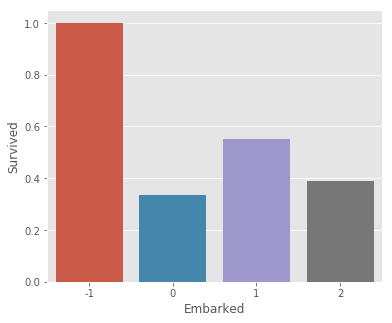

In [40]:
fig, (axis1) = plt.subplots(1,1,figsize=(6,5))
embark_perc = data_train[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,ax=axis1)  # order=['S','C','Q'

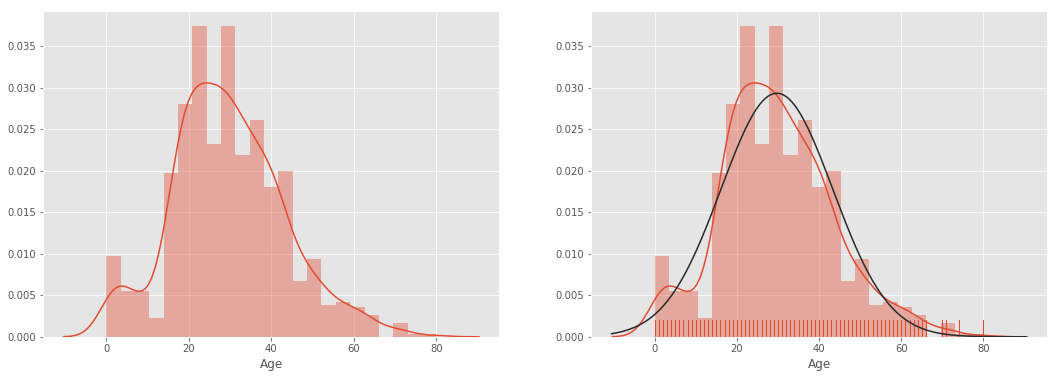

In [12]:
# 单连续变量==>连续分布  某一列

from scipy.stats import norm
f, ax = plt.subplots(1,2,figsize = (18,6))
sns.distplot(data_train['Age'],ax =ax[0])

sns.distplot(data_train['Age'],rug = True, fit = norm,ax =ax[1])
plt.show()

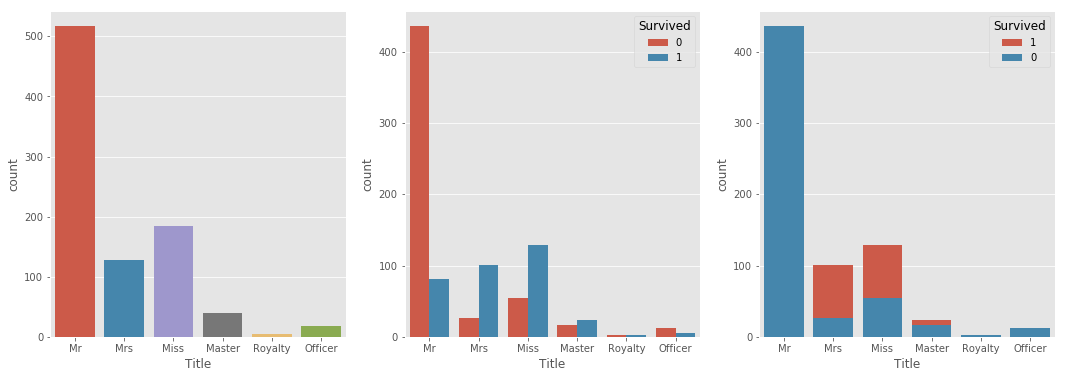

In [13]:
# 单因子变量 ==> 频数统计  countplot
fig, ax = plt.subplots(1,3,figsize=(18,6))
sns.countplot(x='Title', data= data_train,ax =ax[0])
# 映射 目标变量（是否存活）  存在问题 堆积情况下
sns.countplot(x='Title',hue = 'Survived', data= data_train,ax =ax[1])

sns.countplot(x='Title',hue = 'Survived', data= data_train,hue_order =[1,0],dodge = False,ax =ax[2])

### 多变量绘图

#### 散点图

In [59]:
def boo_plot(data,color):
    data.plot(kind ='scatter',x='Age',y='Fare',s=np.pi*(data_train['Family_Size']*3)**2,alpha =0.3,ax=plt.gca())
    

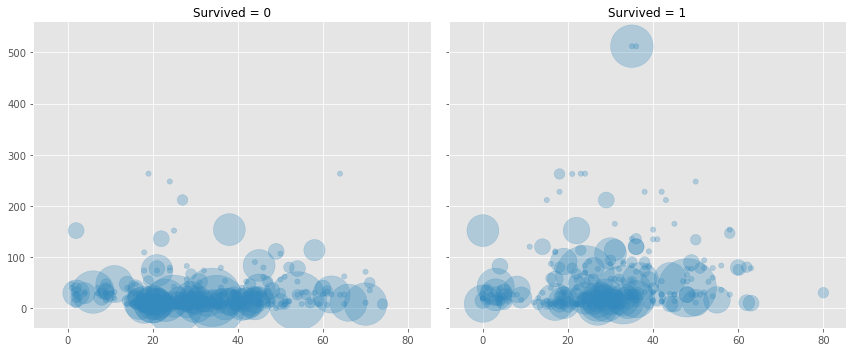

In [60]:
g= sns.FacetGrid(data=data_train,col='Survived',size= 5 ,aspect = 1.2)
g.map_dataframe(boo_plot)

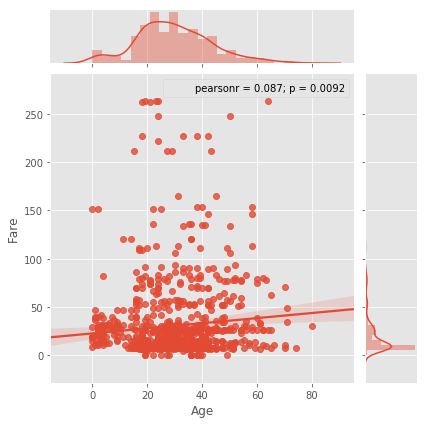

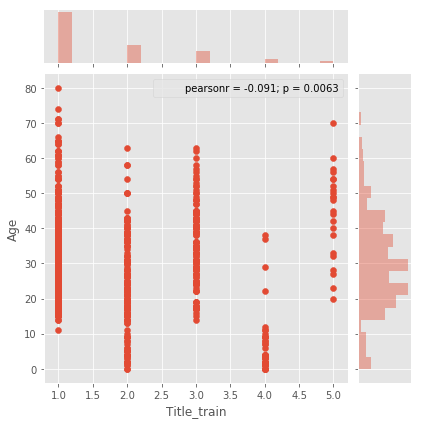

In [49]:
# 体现相关性
# 两个连续变量的相关性 通过这个看
data_temp = data_train.loc[data_train['Fare']<=300]
# f,ax =plt.subplot(1,2,figsize = (18,6))
sns.jointplot('Age','Fare',data =data_temp,kind = 'reg')

sns.jointplot('Title_train','Age',data = data_train)

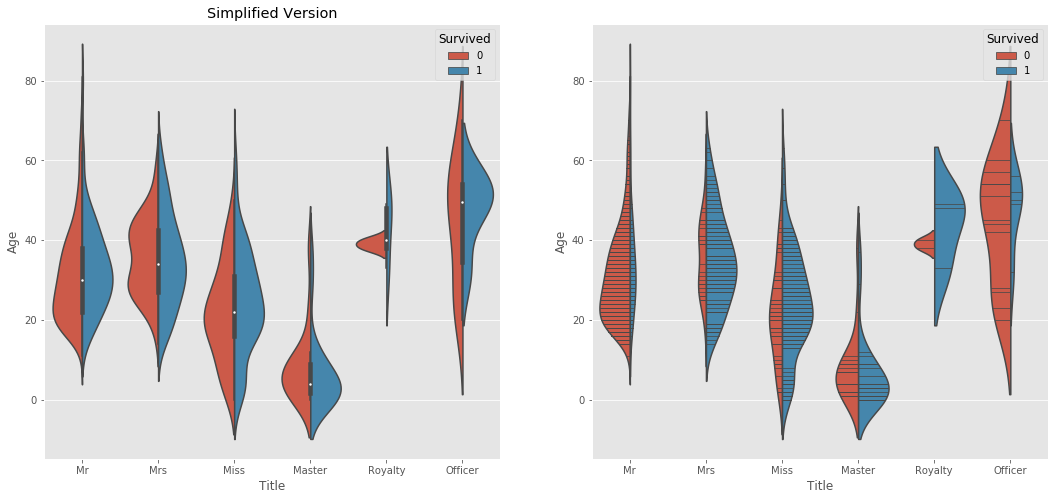

In [52]:
# 优：可以看不到 因子内部的分布情况   映射第三个变量
# 缺：但是不能展示 两个变量的整体分布情况 
f, ax = plt.subplots(1,2,figsize =(18,8))
sns.violinplot('Title','Age',hue ='Survived',data = data_train, split =True, ax =ax[0])
ax[0].set_title("Simplified Version") # 标题不支持中文
sns.violinplot('Title','Age',hue ='Survived',data = data_train, split =True,inner = 'stick',scale ='count', ax =ax[1])

plt.show()

#### 小提琴图

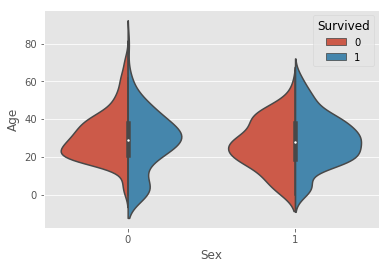

In [57]:
sns.violinplot("Sex","Age", hue="Survived", data=data_train,split=True)

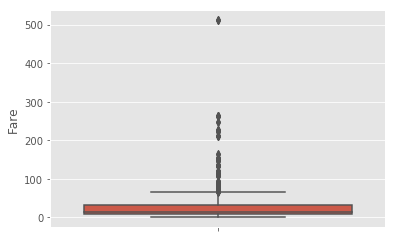

In [58]:
sns.boxplot(y = 'Fare',hue = 'Survived', data= data_train)

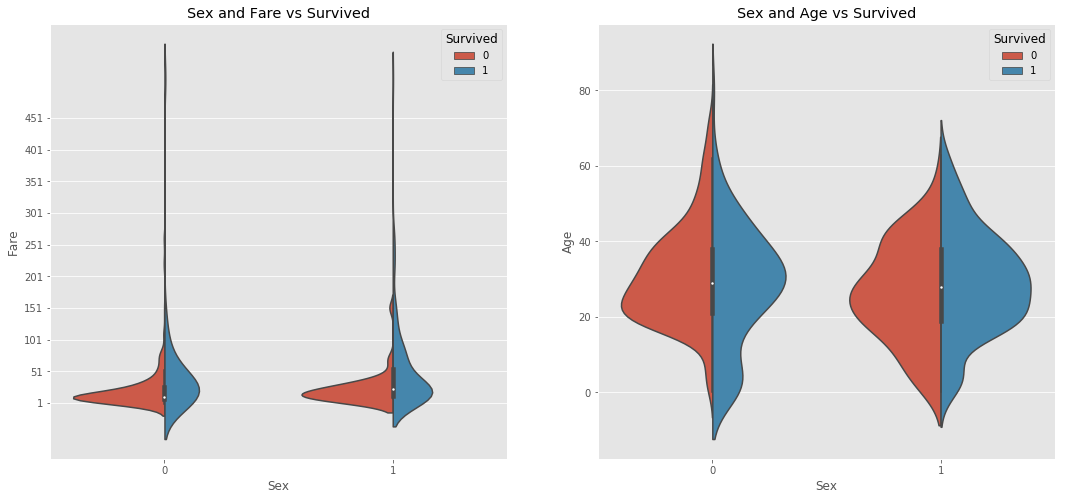

In [54]:
#因为Fare 有极端值  画的也不好看
f, ax = plt.subplots(1,2,figsize =(18,8))
sns.violinplot('Sex','Fare',hue = "Survived", data = data_train, split = True, ax = ax[0])
ax[0].set_title('Sex and Fare vs Survived')
ax[0].set_yticks(range(1,500,50))

sns.violinplot('Sex','Age', hue = "Survived", data = data_train, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')

plt.show()

### 分格单变量

####  按照因子变量映射 （离散型）
- factorplot()      -->  简单本 --factorplot
    + kind : { count,  | box, violin, strip |双变量 point, bar,  |}

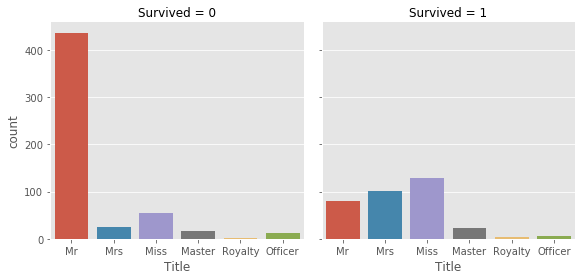

In [15]:
# 单变量 离散型  count (没有连续 分布图)  
sns.factorplot(x='Title', kind ='count',col = 'Survived',data =data_train)

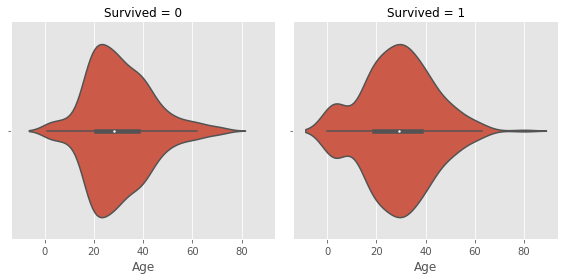

In [16]:
# 单变量 连续型   box, violin, strip
sns.factorplot(x='Age', kind ='violin',col = 'Survived',data =data_train)

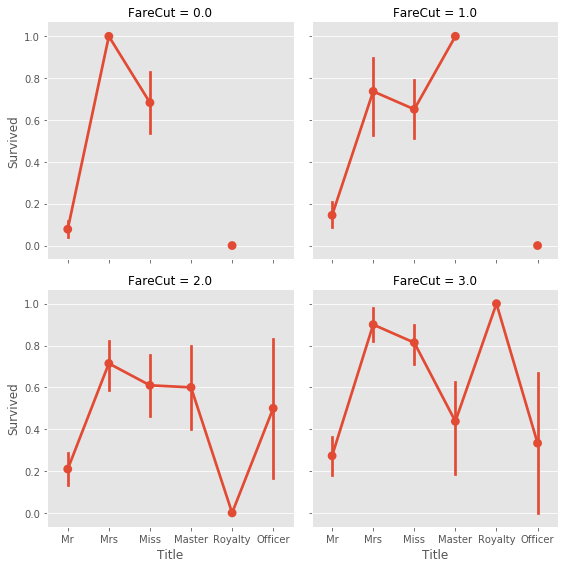

In [17]:
# point 图会给出置信度 ---波动区间    point要求因子变量是 数值型 
# 将目标变量作为y轴
sns.factorplot(x='Title',y='Survived', kind ='point',col = 'FareCut',data =data_train,col_wrap =2)

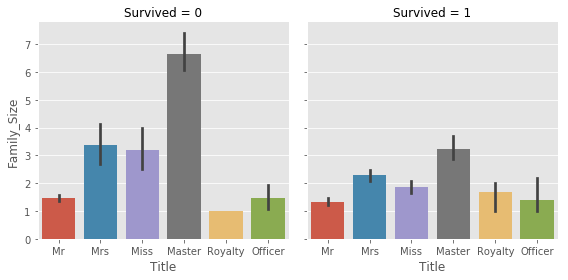

In [18]:
#纵轴 计算的连续变量的平均数（因子数值型）
sns.factorplot(x='Title',y='Family_Size', kind ='bar',col = 'Survived',data =data_train)

####  连续 变量散点图   （连续型）
- lmplot()    -- 散点图

不能用factorplot()

In [ ]:
# sns.factorplot(x='Age',y='Fare',hue="IsAlone", kind ='point',col = 'Survived',data =data_train,col_wrap =2)

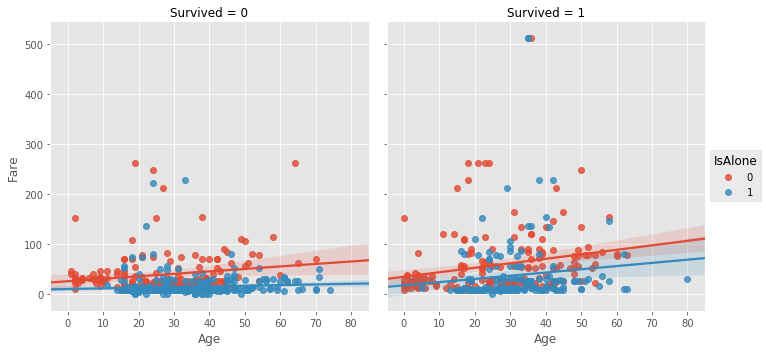

In [23]:
sns.lmplot(x='Age' ,y='Fare' ,hue="IsAlone",col ="Survived",data = data_train)

#### FacetGrid 通用 
Tidy (“long-form”) dataframe

可以map  不同的绘图函数（plt: scatter area hist  | sns: 的函数） 但是函数内部的参数设置？


- 为了将面向对象的绘图库包装成只使用函数的调用接口，pyplot模块的内部保存了当前图表以及当前子图等信息。当前的图表和子图可以使用plt.gcf()和plt.gca()获得，分别表示“Get Current Figure”和“Get Current Axes”。在pyplot模块中，许多函数都是对当前的Figure或Axes对象进行处理
- plt.plot()实际上会通过plt.gca()获得当前的Axes对象ax，然后再调用ax.plot()方法实现真正的绘图

In [29]:
def def_plot(data,color):
    sns.regplot('Age','Fare',data,ax=plt.gca())

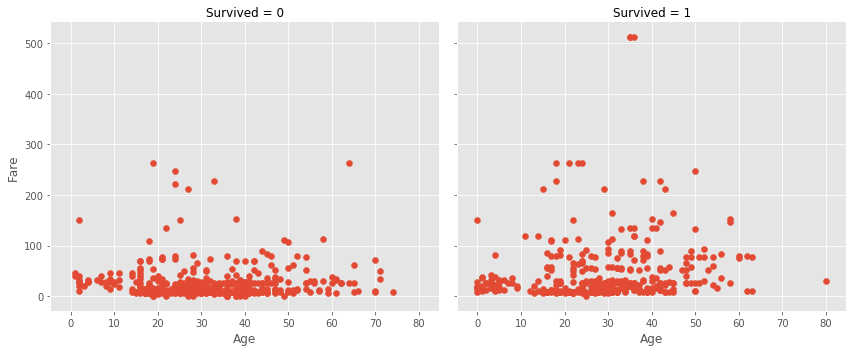

In [32]:
# 设置每个小图 图片尺寸 高：size  宽 ：aspect * size
g = sns.FacetGrid(data_train, col="Survived",size= 5 ,aspect = 1.2)  #   row="smoker"  
# g = g.map(sns.regplot, "Age","Fare")
g = g.map(plt.scatter, "Age","Fare")

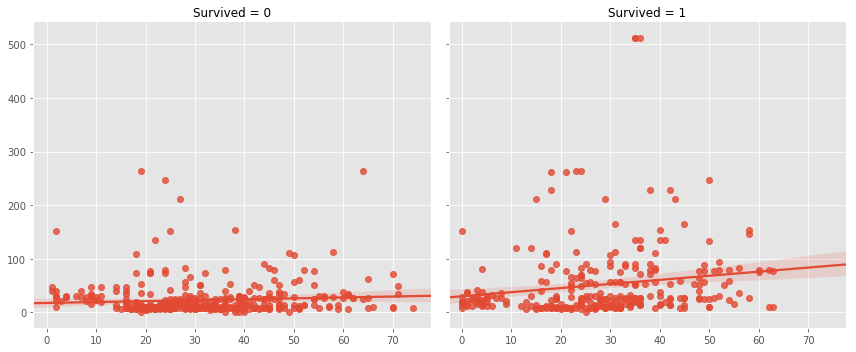

In [31]:
g = sns.FacetGrid(data= data_train, col="Survived",size= 5 ,aspect = 1.2)  #   row="smoker"  
g = g.map_dataframe(def_plot)

###  多变量相关图  pairplot  
#####  pairplot  简便函数
#####  PairGrid   高级函数

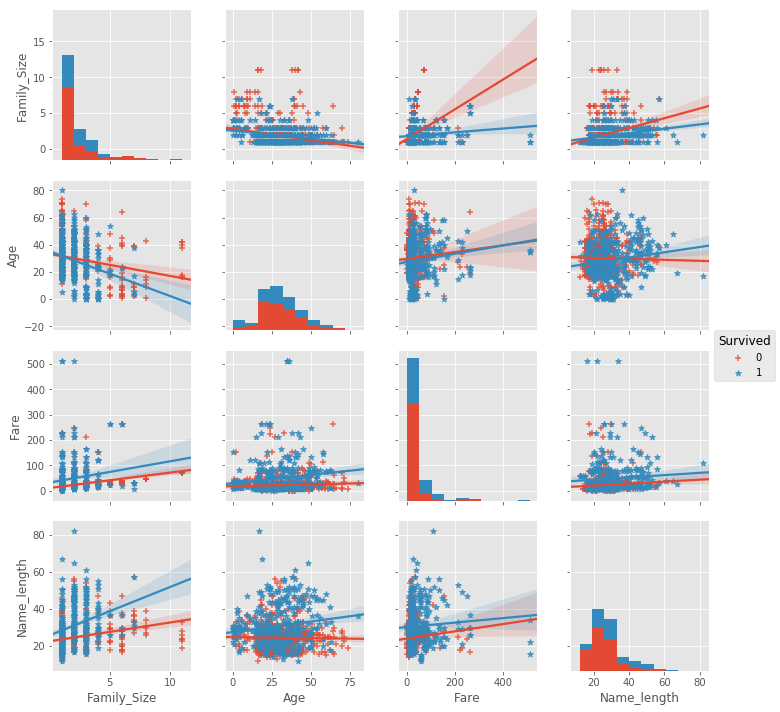

In [20]:
plot_vars = ['Family_Size','Age','Fare','Name_length']

# kind : {‘scatter’, ‘reg’}

sns.pairplot(data = data_train,vars = plot_vars , hue = 'Survived',kind ='reg',markers=["+",'*'])


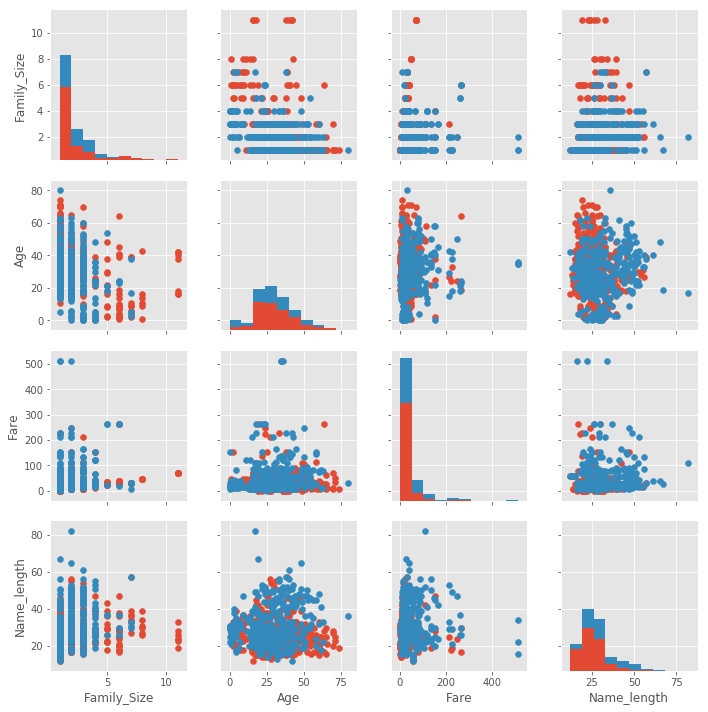

In [21]:
g = sns.PairGrid(data = data_train,vars = plot_vars , hue = 'Survived')
g = g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)

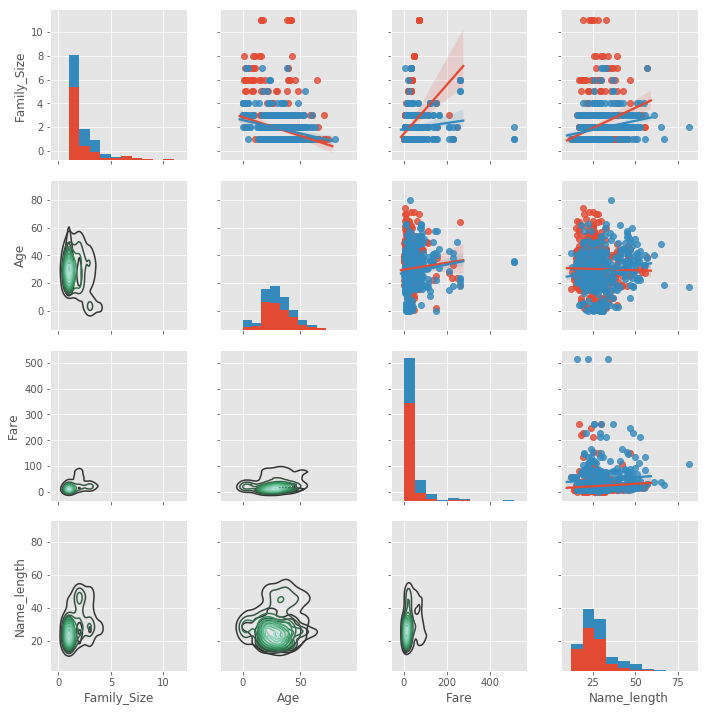

In [63]:
# 自定义上下轴图
g = sns.PairGrid(data = data_train,vars = plot_vars , hue = 'Survived')
g = g.map_upper(sns.regplot)
g = g.map_lower(sns.kdeplot)
g.map_diag(plt.hist)

### 多变量 相关图

In [37]:
train = data_train[['Survived','Pclass','Sex','Age','Parch','Fare','Has_Cabin','Family_Size','IsAlone','Title_train']]

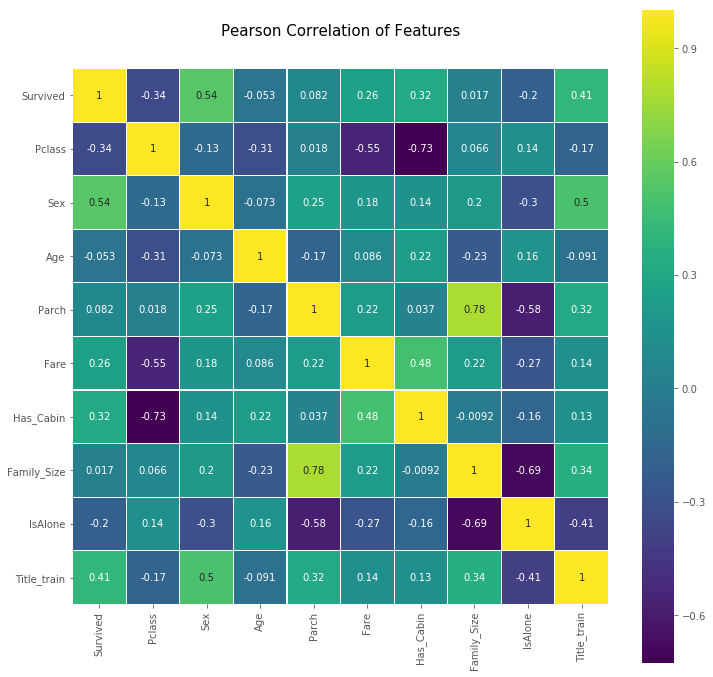

In [38]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)